# Google Advanced Data Analytics
## Course 5 Regression
### Simple Linear Regression


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
# Load dataset 
penguins = sns.load_dataset("penguins")

In [4]:
#Examine first 5 rows of datset 
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Since we are working with simple linear regression we are focused on continuous variables

In [5]:
# Keep only Adelie and Gentoo penguins and drop NAs 
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

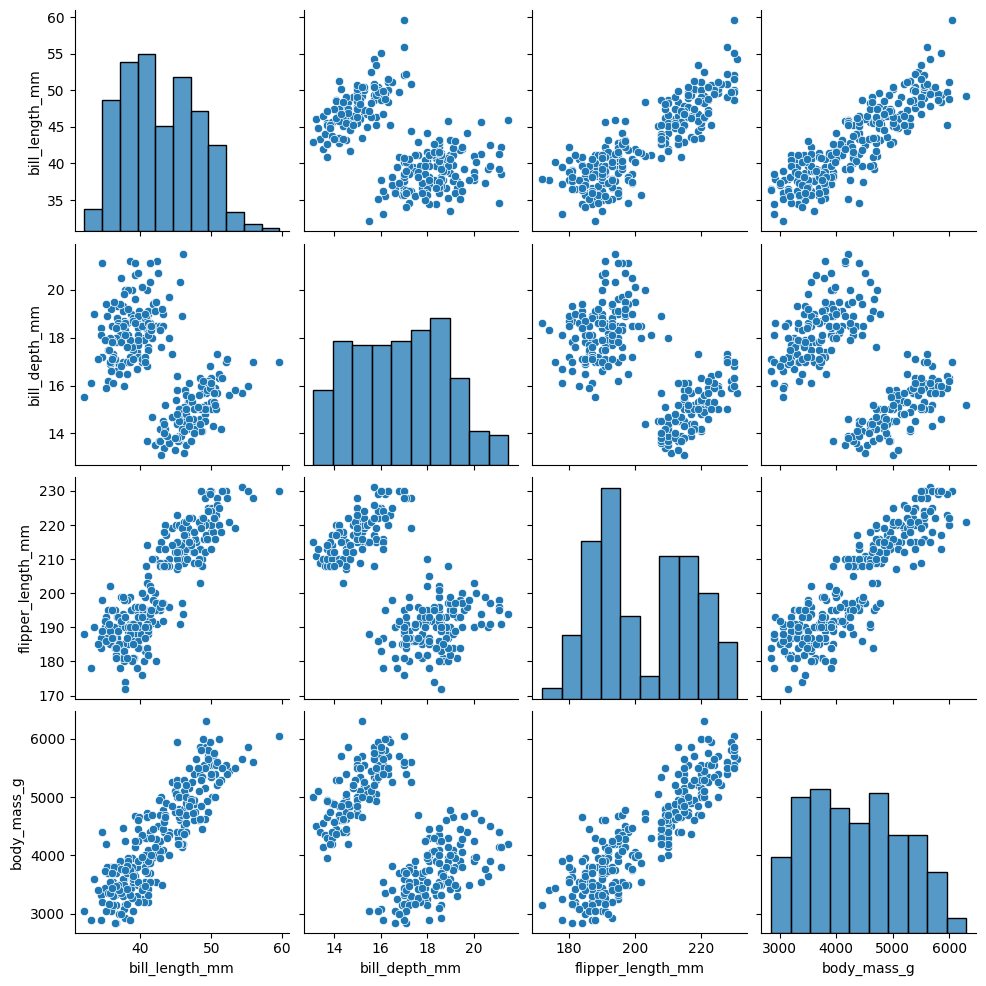

In [6]:
sns.pairplot(penguins_final)
# this function creates a scatterplot matrix:
# A series of scatterplots that show the relationships between pairs of variables

In [7]:
#subset data 
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [8]:
# Write out the regression formula
ols_formula = "body_mass_g ~ bill_length_mm"

> `~` lets the computer know whatever comes after it is a `X` variable

In [9]:
# IMport the ols function 
from statsmodels.formula.api import ols

In [10]:
# Build OLS, fir model to data 
OLS = ols(formula = ols_formula, data = ols_data) 
model = OLS.fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.33e-85
Time:                        10:24:21   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>- Slope = beta1 = row(bill_length_mm) and column(coef) = 141.1904
>- INtercept = Beta0 = coef- -1707.29

Rewriting it in a linear equation 
- `y = intercept + slope * x`
- `y = -1707.29 + 141.1904 * x`
>- `y` = Penguins Body mass(g)
>- `x` = penguins bill length(mm)
>- `intercept` = -1707.29
>- `slope` = 141.1904

P-value tests the null hypothesis that coefficient is 0
- H0: Beta1 = 0 **We reject the null hypothesis** 
- H1: Beta1 != 0


In [12]:
# Subset X variable
X = ols_data["bill_length_mm"]


# Get predictions from model 
fitted_values = model.predict(X)

In [13]:
# Calculate residuals
residuals = model.resid

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

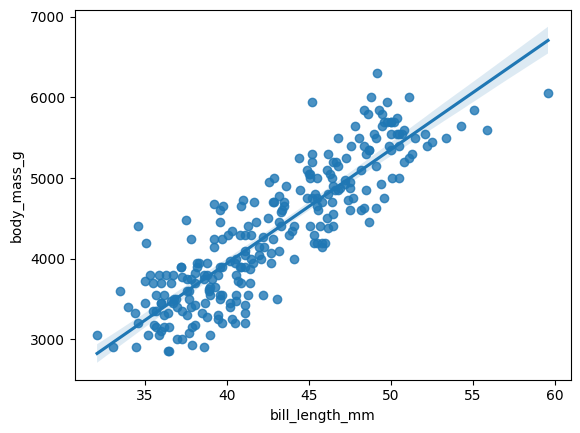

In [14]:
# creating plots to confirm our findings 
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

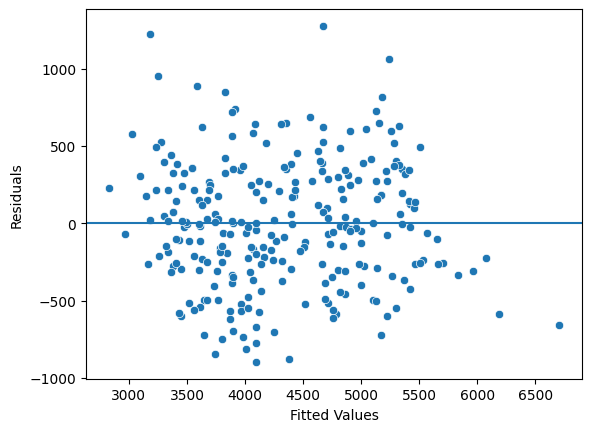

In [15]:
# creating a scatter plot of a fitted values against residuals
import matplotlib.pyplot as plt
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

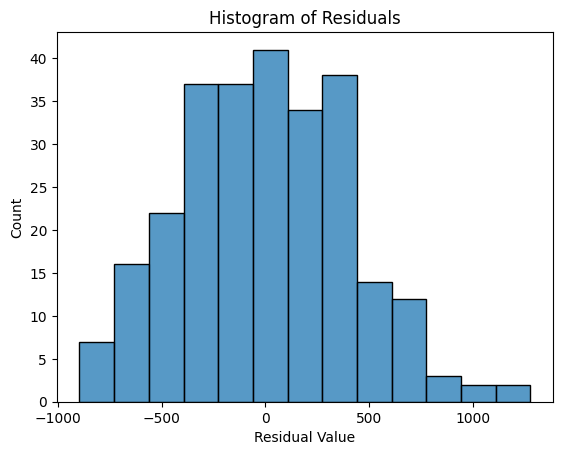

In [16]:
# Creating a histogram of our residuals
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

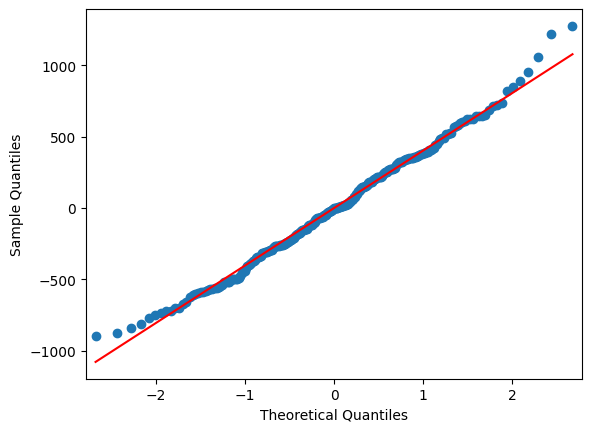

In [17]:
# making a q-q plot to check for normality of residuals
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Multi Linear Regression


In [18]:
import pandas as pd 
import seaborn as sns
penguins = sns.load_dataset("penguins")

In [19]:
# Subset the data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Result index
penguins.reset_index(inplace=True, drop=True)

In [20]:
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
3,3450.0,36.7,Female,Adelie
4,3650.0,39.3,Male,Adelie


In [21]:
# IN order to use the holdout sample we must subset x and y variable 
penguins_X = penguins[["bill_length_mm", "gender", "species" ]]
penguins_Y = penguins["body_mass_g"]

In [22]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [23]:
# now devide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_Y, test_size=0.3, random_state=42)

`test_size` variable is the proportion of data you're randomly assigning to the holdout dataset
- 0.3 = 30% of the data is used as test data

- `random_state` variable does not have to be set, but you are assigning it the value of 42 so that you can replicate the results. 

In [24]:
# defining a variable to calculate the multi linear regression
ols_formula = "body_mass_g ~ bill_length_mm +C(gender)+ C(species)"

- `C` notation lets ols variable know that gender and species are categorical variable. 

In [25]:
from statsmodels.formula.api import ols

In [26]:
# Create OLS dataframe 
ols_data = pd.concat([X_train, y_train], axis = 1)

In [27]:
# Create OLS object and fit the model to the data 
OLS = ols(formula = ols_formula, data = ols_data)

In [28]:
model = OLS.fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.31e-92
Time:                        10:24:23   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic regression model
### Part 1

In [30]:
import pandas as pd 
import seaborn as sns 


In [31]:
# Load in the dataset
activity = pd.read_csv("~/Desktop/data_analysis/DATA/Google_Data/activity.csv")

In [32]:
# Get summary statistics about the dataset 
print(activity.describe())
print(activity.head())
print(activity.shape)

       Acc (vertical)   LyingDown
count      494.000000  494.000000
mean        45.512363    0.516194
std         44.799360    0.500244
min        -48.459000    0.000000
25%          0.918650    0.000000
50%         41.109500    1.000000
75%         89.339000    1.000000
max        112.310000    1.000000
   Acc (vertical)  LyingDown
0          96.229          0
1          84.746          0
2          82.449          0
3         106.560          0
4          80.152          0
(494, 2)


#### Constructing binomial logistic regression model 

In [33]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
# save the data into X and y variables
X = activity[["Acc (vertical)"]]
y = activity["LyingDown"]

In [35]:
# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [36]:
# building our classifier, and fit the model to the data by using .fit() function. 
# Save the fitted model as a variable called clf.
clf = LogisticRegression().fit(X_train, y_train)


#### Get coefficients and visualize model 
> We can use the `coef_` and `intercept_` attributes of the `clf` object to get the coefficient and intercept of our model. 


In [37]:
# Print the coefficient 
clf.coef_

array([[-0.1177471]])

In [38]:
# Print the intercept
clf.intercept_

array([6.10180958])

>- So, based on what we've found, our model has an intercept or 𝛽0 of 6.10 and a 𝛽1 of -0.12. Now we can plot our model and data with a 95% confidence band using the `regplot()` function from the `seaborn` package.

>- Remember to set the argument `logistic=True` so that the function knows we are plotting a logistic regression model, not a linear regression model.



/home/adnan/anaconda3/envs/myenv/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

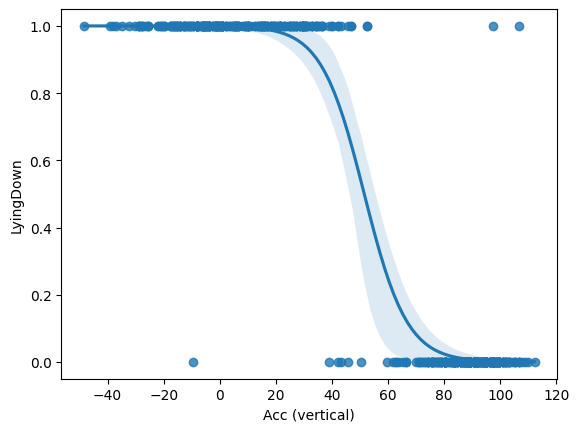

In [39]:
# Plot the logistic regression and its confidence band 
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

### Confusion Matrix (Part 2)
Construct logistic regression model 


In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build regression model 
clf = LogisticRegression().fit(X_train, y_train)

# Save predictions
y_pred = clf.predict(X_test)

We can print out the predicted labels by just calling on `clf.predict(X_test)`. Recall that 0 MEANS NOT LYING DOWN, AND 1 MEANS LYING DOWN 


In [41]:
# print out the pridicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

> We can print out the predicted probabilities with `.predict_proba(X_test)[]` function

In [42]:
# Print out the predicted probabilities 
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

#### Creating a confusion matrix
> **Confusion matrix:** A graphical representation of how accurate a classifier is at predicting the labels for categorical variable 

To create a confusion matrix, we'll use the `confusion_matrix()` function from the `metrics` module of `scikit-learn`. To use the function, we'll need to input the following:

- Actual labels of the holdout sample, stored as `y_test`
- Predicted labels of the holdout sample, stored as `y_pred`
- The names of the labels, which you can access using `clf.classes_`



In [43]:
# Split data into trianing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build regression model 
clf = LogisticRegression().fit(X_train, y_train)

# Save predictions
y_pred = clf.predict(X_test)

In [44]:
# pRINT OUT THE PREDICTED LABELS WHERE 0 means not lying down and 1 means lying down
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [45]:
# Print out the predicted probabilities 
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

#### Create confusion matrix
- **Confusion Matrix:** A graphical representation of how accurate a classsifier is at predicting the labels for a categorical variable. 

To create a confusion matrix, we'll use the `confusion_matrix()` function from the `metrics` module of `scikit-learn`. To use the function, we'll need to input the following:

- Actual labels of the holdout sample, stored as `y_test`
- Predicted labels of the holdout sample, stored as `y_pred`
- The names of the labels, which you can access using `clf.classes_`

**Note:** If there were more classes, we would have more numbers or labels in `clf.classes_`. Since this is a binomial logistic regression, there are only two labels, 0 and 1.

In [46]:
# IMport the metrics module from scikit-learn 
import sklearn.metrics as metrics

# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

- The upper-left quadrant displays the number of **true negatives**.
- The bottom-left quadrant displays the number of **false negatives**.
- The upper-right quadrant displays the number of **false positives**.
- The bottom-right quadrant displays the number of **true positives**.

We can define the above bolded terms as follows in our given context:

- **True negatives:** The number of people that were not lying down that the model accurately predicted were not lying down .
- **False negatives:** The number of people that were lying down that the model inaccurately predicted were not lying down.
- **False positives:** The number of people that were not lying down that the model inaccurately predicted were lying down. 
- **True positives:** The number of people that were lying down that the model accurately predicted were lying down. 

A perfect model would yeild all true negatives and true positives, and no false negatives or false positives.


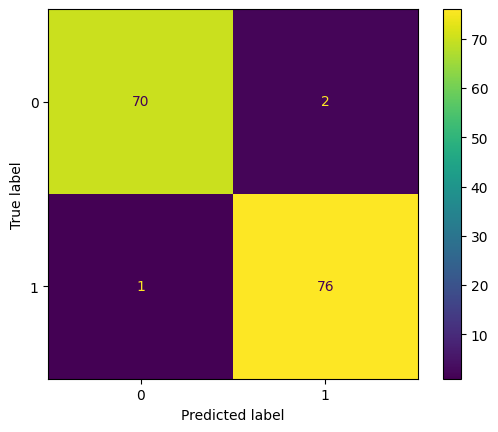

In [47]:
# Display the confusion matrix
disp.plot()

#### Precision
- Measure the proportion of positive predictions that were true positives 
Precision = True Positives / True Positives + False Positives

In [48]:
import sklearn.metrics as metrics
metrics.precision_score(y_test, y_pred)

0.9743589743589743

#### Recall
- Measure the proportion of positives the model was able to identify correctly 
recall = True Positives / True Positives + False Negatives 

In [49]:
metrics.recall_score(y_test, y_pred)

0.987012987012987

#### Accuracy 
- Measures the proportion of data points that were correctly categorized 
Accuracy = True Positives + True Negatives / Total Predictions                          

In [51]:
metrics.accuracy_score(y_test, y_pred)  

0.9798657718120806

#### ROC CURVE
Receiver operating characteristic curve

In [52]:
## ROC Curves
import matplotlib.pyplot as plt 
from sklearn.metrics import RocCurveDisplay 


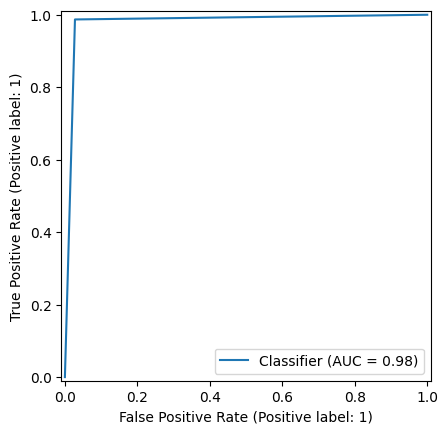

In [53]:
# Plot the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

#### AUC:
Stands for area under the ROC curve. AUC provides an aggregate measure of performance across all po

In [54]:
metrics.roc_auc_score(y_test, y_pred)


0.9796176046176045

## ANOVA
### Part 1
**One-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.

**Two-way ANOVA:** Compares the means of one continuous dependent variable based on three or more groups of two categorical variables

In [87]:
import pandas as pd
import seaborn as sns

In [88]:
# Load in diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
#Check how many diamonds are each color grade
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [90]:
# Subset for colorless diamonds
colorless = diamonds[diamonds["color"].isin(["E","F","H","D","I"])]

#Select only color and price columns, and reset index 
colorless = colorless[["color","price"]].reset_index(drop=True)

In [91]:
# Remove dropped categories of diamonds color 
colorless.color = colorless.color.cat.remove_categories(["G","J"])

# CHeck that the dropped categories have been removed
colorless["color"].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [125]:
# import math package
import math 

# Take the logarithm of the price, and insert it as the third column 
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

ValueError: cannot insert log_price, already exists

In [93]:
# Drop rows with missing values 
colorless.dropna(inplace=True)

#Reset index
colorless.reset_index(inplace=True, drop=True)

In [94]:
# Examine first 5 rows of cleaned data set 
colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [95]:
# Save to diamonds.csv
colorless.to_csv('diamonds.csv',index=False, header=list(colorless.columns))

#### One-Way ANOVA


In [96]:
# Save diamonds.csv as a variable called diamonds 
diamonds = pd.read_csv("diamonds.csv")


In [97]:
# Examine first 5 rows of diamonds data set 
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


<Axes: xlabel='color', ylabel='log_price'>

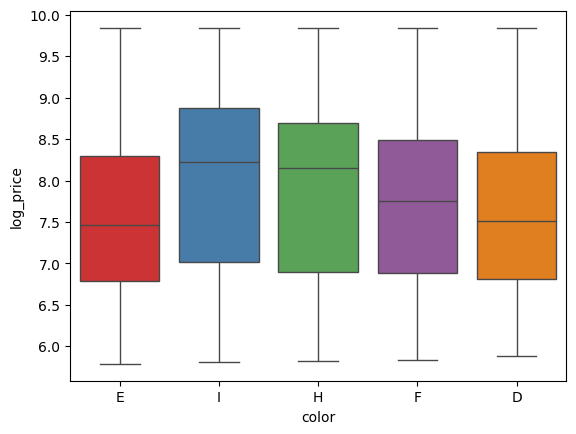

In [101]:
# Create boxplot to show distribution of price by color grade
sns.boxplot(x = "color", y = "log_price", data = diamonds, hue='color', palette='Set1')

In [102]:
# IMport the statsmodels and ols function 
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [104]:
# Construct simple linear regression model, and fir the model 
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()


In [105]:
# Get summary statistics 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          3.61e-225
Time:                        16:40:30   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Run one-way ANOVA 
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [107]:
sm.stats.anova_lm(model, typ = 1)


,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [108]:
sm.stats.anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


### Data Cleaning 2


In [109]:
# IMport diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)


In [110]:
# Examine first 5 rows of data set 
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [112]:
# Subset for color, cut, price columns 
diamonds2 = diamonds[["color", "cut", "price"]]

# Only include colorless diamonds 
diamonds2 = diamonds2[diamonds2["color"].isin(["E","F","H","D","I"])]

# Drop removed colors, G and J 
diamonds2.color = diamonds2.color.cat.remove_categories(["G","J"])

# Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2["cut"].isin(["Ideal","Premium","Very Good"])]

# Drop removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good","Fair"])

# Drop NaNs
diamonds2.dropna(inplace = True)

# Reset index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for logarithm of price 
diamonds2.insert(3, "log_price",[math.log(price) for price in diamonds2["price"]])


In [113]:
# Examine the data set 
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [115]:
# Save as diamonds2.csv
diamonds2.to_csv('diamonds2.csv', index=False, header=list(diamonds2.columns))

#### Two-Way ANOVA

In [116]:
# Load the data set 
diamonds2 = pd.read_csv("diamonds2.csv")

In [117]:
# Examine the first 5rowa of the data set 
diamonds2.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


In [118]:
# Construct a multiple linear regression with an interaction term between color and cut 
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

In [119]:
# Get summary statistics 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:10:28   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> - The syntax for two way ANOVA is the same as for the on-way ANOVA. 

In [120]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)
 

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


TWO-WAY ANOVA results
- Logarithm of the price is NOT the same for different colors 
- Logarithm of the price is NOT the same for different diamond cuts 
- There is an interaction effect between the color and cut that impacts the price of the diamond.

In [121]:
sm.stats.anova_lm(model2, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [ ]:
sm.stats.anova_lm(model2, typ = 3)

### Post hoc ANOVA test 


In [132]:
# IMport Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [134]:
# Run Tukey's HSD post hoc test for one-way ANOVA 
tukey_oneway = pairwise_tukeyhsd(endog = diamonds2["log_price"], groups = diamonds2["color"], alpha = 0.05)

In [135]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True
